In [35]:
import pandas as pd
import numpy as np
import praw
import datetime
from matplotlib import pyplot as plt
from collections import defaultdict

In [3]:
# hide my api access stuff
auth = open("secret", "r").read().split('|')
CLIENT_ID = auth[0]
SECRET_KEY = auth[1]

In [106]:
# make a PRAW reddit instance
reddit = praw.Reddit (
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    user_agent="uhhh idk",
)

USER_ONE = 'jmct' #professor
# USER_TWO = 'ariqbailey'
# USER_ONE = 'ariqbailey'

# get users account creation dates
user_one_creation = reddit.redditor(USER_ONE).created_utc
user_two_creation = reddit.redditor(USER_TWO).created_utc

In [107]:
# get users comments
LIMIT = None
user_one_comments = reddit.redditor(USER_ONE).comments.new(limit=LIMIT)
one_comment_df = pd.DataFrame(columns=['body', 'body_length', 'subreddit', 'created_utc'])

i = 0
for comment in user_one_comments:
    one_comment_df.loc[i] = [comment.body, len(comment.body), comment.subreddit, comment.created_utc]
    i += 1

In [108]:
one_comment_df.head()

,body,body_length,subreddit,created_utc
0,Depends what you mean by Professor.\n\nTechnic...,523,UMD,1.616204e+09
1,"I find it very demoralizing and, worse, diffic...",186,UMD,1.614618e+09
2,I actually thought the point was more interest...,368,musictheory,1.612901e+09
3,"It all seems relatively benign, which just rai...",72,law,1.611119e+09
4,I’ve always found mutt to be clunky with multi...,199,linux,1.610816e+09


In [109]:
# add date column
one_comment_df['date'] = [None] * len(one_comment_df)

# add standard date
for i,r in one_comment_df.iterrows():
    one_comment_df.at[i, 'date'] = datetime.datetime.fromtimestamp(r['created_utc'])

In [110]:
one_comment_df.head(n=50)

,body,body_length,subreddit,created_utc,date
0,Depends what you mean by Professor.\n\nTechnic...,523,UMD,1.616204e+09,2021-03-19 21:40:39
1,"I find it very demoralizing and, worse, diffic...",186,UMD,1.614618e+09,2021-03-01 12:05:00
2,I actually thought the point was more interest...,368,musictheory,1.612901e+09,2021-02-09 14:55:52
3,"It all seems relatively benign, which just rai...",72,law,1.611119e+09,2021-01-20 00:04:11
4,I’ve always found mutt to be clunky with multi...,199,linux,1.610816e+09,2021-01-16 11:45:58
5,"Your naming of your arguments is a bit odd, do...",174,haskell,1.610209e+09,2021-01-09 11:24:58
6,That's what this post is about :D\n\nI've tran...,202,jazzguitar,1.607113e+09,2020-12-04 15:12:35
7,"I don't think it's 'out' at all, it's definite...",276,jazzguitar,1.607107e+09,2020-12-04 13:44:55
8,Sounds great! What setting you using on the Ca...,115,John_Frusciante,1.600382e+09,2020-09-17 18:33:30
9,"It’s saving for the tax payer, but profit for ...",100,science,1.591832e+09,2020-06-10 19:36:43


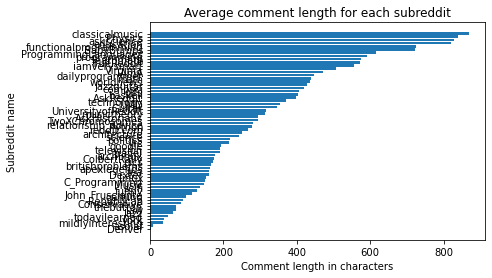

In [111]:
subreddits = {}
for i, r in one_comment_df.iterrows():
    if(not str(r['subreddit']) in subreddits):
        subreddits[str(r['subreddit'])] = [0, 0]

    subreddits[str(r['subreddit'])] = [subreddits[str(r['subreddit'])][0] + r['body_length'], subreddits[str(r['subreddit'])][1] + 1]

sub_avgs = {}
sub_avgs = defaultdict(lambda: 0, sub_avgs)

for k in subreddits:
    sub_avgs[k] = int(subreddits[k][0] / subreddits[k][1])

sub_names_sorted = []
sub_avgs_sorted = []
for i in sorted(sub_avgs.keys(), key=lambda x: sub_avgs[x]):
    sub_names_sorted.append(i)
    sub_avgs_sorted.append(sub_avgs[i])

plt.barh(sub_names_sorted, sub_avgs_sorted)
plt.title('Average comment length for each subreddit')
plt.xlabel('Comment length in characters')
plt.ylabel('Subreddit name')
plt.show()

Looking at this graph, we should therefore be able to create a weight with a linear relationship to comment_body_length

In [112]:
# generate weights proportional to average comment length for each subreddit
one_avg_comment_len = one_comment_df['body_length'].mean()

one_comment_df['length_weight'] = [None] * len(one_comment_df)

for i,r in one_comment_df.iterrows():
    one_comment_df.at[i, 'length_weight'] = r['body_length'] / one_avg_comment_len

one_comment_df.head()

,body,body_length,subreddit,created_utc,date,length_weight
0,Depends what you mean by Professor.\n\nTechnic...,523,UMD,1.616204e+09,2021-03-19 21:40:39,1.31217
1,"I find it very demoralizing and, worse, diffic...",186,UMD,1.614618e+09,2021-03-01 12:05:00,0.46666
2,I actually thought the point was more interest...,368,musictheory,1.612901e+09,2021-02-09 14:55:52,0.923285
3,"It all seems relatively benign, which just rai...",72,law,1.611119e+09,2021-01-20 00:04:11,0.180643
4,I’ve always found mutt to be clunky with multi...,199,linux,1.610816e+09,2021-01-16 11:45:58,0.499276


Text(0, 0.5, 'Subreddit')

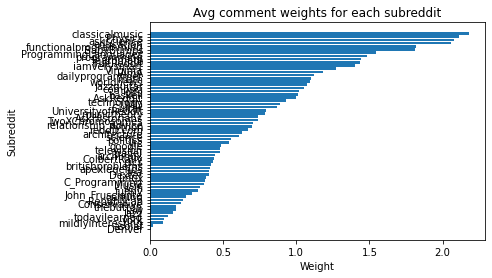

In [113]:
# print avg length_weight for each subreddit

subs_comment_weights = {}
subs_comment_weights = defaultdict(lambda: 0, subs_comment_weights)
for k in subreddits:
    sub_df = one_comment_df[one_comment_df.subreddit == k]
    subs_comment_weights[k] = sub_df['length_weight'].mean()

# {l: v for k,v in sorted(subs_comment_weights.items(), key=lambda item: item[1])}
sorted_comment_weights = sorted(subs_comment_weights.items(), key=lambda x: x[1])
    
x = []
y = []
for k, v in sorted_comment_weights:
    x.append(k)
    y.append(v)

plt.barh(x, y)
plt.title('Avg comment weights for each subreddit')
plt.xlabel('Weight')
plt.ylabel('Subreddit')

By comparing the shape of this with the previous graph, we can be happy that our weights properly reflect comment length.

# get users posts
user_one_posts = reddit.redditor(USER_ONE).submissions.new(limit=LIMIT)
one_post_df = pd.DataFrame(columns=['title', 'body', 'body_length', 'subreddit', 'created_utc'])

i = 0
for post in user_one_posts:
    one_post_df.at[i] = [post.title, post.selftext, len(post.selftext), post.subreddit, post.created_utc]
    i += 1

one_post_df.head()

In [115]:
# comments/posts interest age

# weight comments and weight posts appropriately
COMMENT_CONSTANT = 1.0
SUBMISSION_CONSTANT = 9.0

AVG_POST_LENGTH = NaN
AVG_COMMENT_LENGTH = NaN
ACCOUNT_AGE = NaN